In [1]:
import os

%load_ext autoreload
%autoreload 2

""""
Devo code for moment by moment decoding --> i.e., for each time bin, find strength of representation of
each class of a variable (e.g., shape), as opposed to decoding average accuracy across trials.

Here collecting methods and quick analyses
"""

'"\nDevo code for moment by moment decoding --> i.e., for each time bin, find strength of representation of\neach class of a variable (e.g., shape), as opposed to decoding average accuracy across trials.\n\nHere collecting methods and quick analyses\n'

# Load a dataset

To load and plot a dataset of neural activity across population, in a PopAnal class object.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# (1) Load the dataset Diego 230630

In [4]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper

DFallpa = load_handsaved_wrapper()


In [5]:
DFallpa

,which_level,event,bregion,twind,pa,pa_x_shape
0,trial,03_samp,M1,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(43, 646, 160)"
1,trial,03_samp,PMv,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(77, 646, 160)"
2,trial,03_samp,PMd,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(41, 646, 160)"
3,trial,03_samp,dlPFC,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(27, 646, 160)"
4,trial,03_samp,vlPFC,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(50, 646, 160)"
5,trial,03_samp,FP,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(41, 646, 160)"
6,trial,03_samp,SMA,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(49, 646, 160)"
7,trial,03_samp,preSMA,"(-0.8, 0.8)",<neuralmonkey.classes.population.PopAnal objec...,"(57, 646, 160)"


# Preprocessing

### FR Normalization

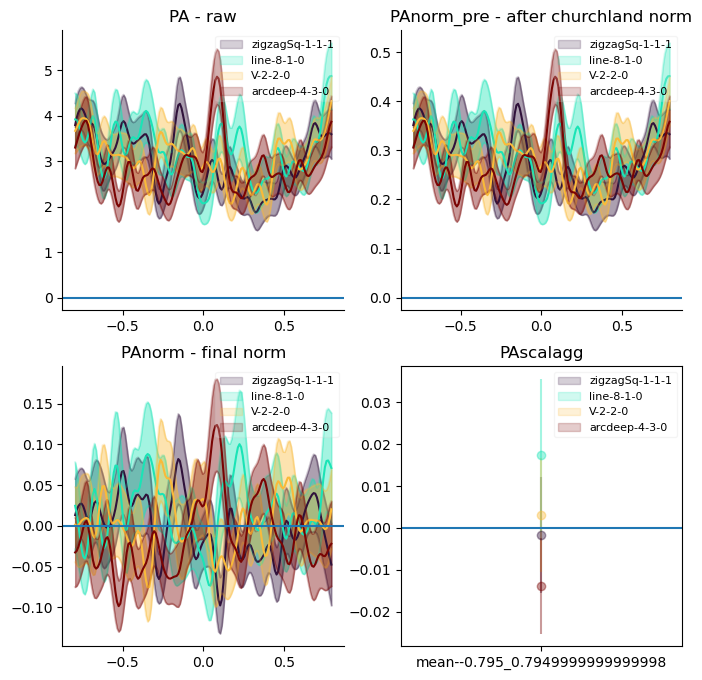

In [6]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_fr_normalization
fr_normalization_method = "each_time_bin"
# fr_normalization_method = "across_time_bins"
plot_savedir = "/tmp"
dfallpa_preprocess_fr_normalization(DFallpa, fr_normalization_method, plot_savedir)

### Factorize all relevant labels FIRST here.


In [7]:
if False: # Ingore this for now
    from neuralmonkey.analyses.decode_good import preprocess_factorize_class_labels_ints
    MAP_LABELS_TO_INT = preprocess_factorize_class_labels_ints(DFallpa)

### Pull out PMv data for now

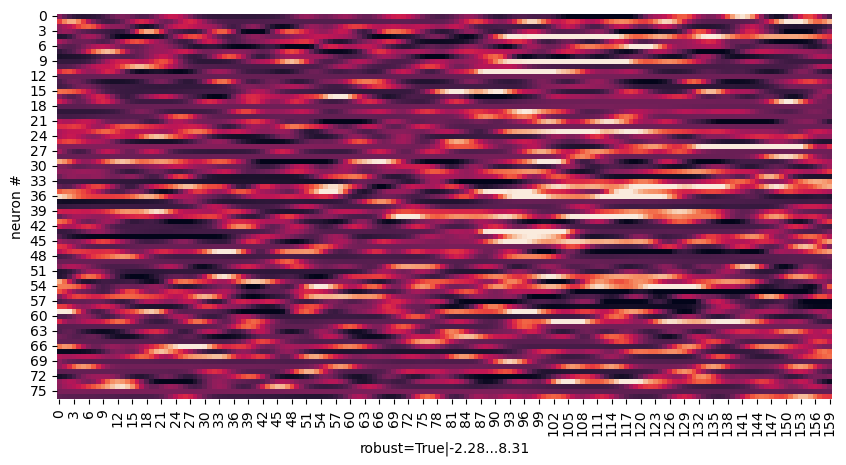

In [8]:
bregions = ["PMv"]
events = ["03_samp"]

DFallpa = DFallpa[(DFallpa["bregion"].isin(bregions)) & (DFallpa["event"].isin(events))].reset_index(drop=True)
PA =DFallpa["pa"].values[0]
PA.plotNeurHeat(trial=100)



# Relevant behavioral labels

In [9]:
dflab = PA.Xlabels["trials"]

# -- Image features
# Each trial can have 1,2,3,or 4 strokes in the image
print(dflab["FEAT_num_strokes_task"].value_counts())

# Each trial has a specific set of locations that the shapes are presented:
print(dflab["taskconfig_loc"].value_counts())

# Each trial has a specific set of shapes presented
print(dflab["taskconfig_shp"].value_counts())

# Each trial has a specific set of (location x shapes) presented
print(dflab["taskconfig_shploc"].value_counts())



FEAT_num_strokes_task
3    362
1    183
4     97
2      4
Name: count, dtype: int64
taskconfig_loc
((-1, 0), (-1, 1), (1, 0), (1, 1))    97
((-1, 0), (-1, 1), (1, 1))            96
((-1, 0), (-1, 1), (1, 0))            93
((-1, 0), (1, 0), (1, 1))             91
((-1, 1), (1, 0), (1, 1))             82
((1, 0),)                             49
((-1, 1),)                            46
((-1, 0),)                            45
((1, 1),)                             43
((-1, 0), (1, 0))                      2
((-1, 1), (1, 0))                      1
((-1, 1), (1, 1))                      1
Name: count, dtype: int64
taskconfig_shp
(V-2-2-0, arcdeep-4-3-0, line-8-1-0, zigzagSq-1-1-1)    97
(V-2-2-0, arcdeep-4-3-0, zigzagSq-1-1-1)                95
(V-2-2-0, arcdeep-4-3-0, line-8-1-0)                    94
(V-2-2-0, line-8-1-0, zigzagSq-1-1-1)                   90
(arcdeep-4-3-0, line-8-1-0, zigzagSq-1-1-1)             83
(V-2-2-0,)                                              50
(zigzagSq-1-1-

In [10]:
# - Behavior features

# What shape did he do first, second, third, etc
# NOTE: some trials he does fewer shapes than exist on screen -- those cases he was sloppy in stroke quality, and he was aborted
dflab["seqc_0_shape"]
dflab["seqc_1_shape"]
dflab["seqc_2_shape"]
dflab["seqc_3_shape"]

# and onset location...
dflab["seqc_0_loc"]


0       (1, 1)
1      (-1, 0)
2       (1, 0)
3       (1, 1)
4       (1, 0)
        ...   
641     (1, 0)
642     (1, 0)
643     (1, 0)
644     (1, 0)
645    (-1, 1)
Name: seqc_0_loc, Length: 646, dtype: object

In [11]:
# This is a location config that is "ambiguous" in that on diff trials he will start on variable lcoations, iether (-1,0) or (1,1)

# These are the trials
dflab[dflab["taskconfig_loc"] == ((-1,0), (-1,1), (1,1))]

# Locations are variable
dflab[dflab["taskconfig_loc"] == ((-1,0), (-1,1), (1,1))]["seqc_0_loc"].value_counts()


seqc_0_loc
(1, 1)     58
(-1, 0)    38
Name: count, dtype: int64

# Decoding --> on each trial, can we decode him thinking about the shapes at locations (-1,0) and (1,1)?

##### Train decoder (fiurst Extract data for pre-samp and post-samp)

In [12]:
# Train decoder on trials that only have one stroke..

inds = dflab[dflab["FEAT_num_strokes_task"]==1].index.tolist()
PAtrain = PA.slice_by_dim_indices_wrapper("trials", inds, reset_trial_indices=True)


(183, 77)
183
zigzagSq-1-1-1 [0 0 0 1]
line-8-1-0 [0 0 1 0]
line-8-1-0 [0 0 1 0]
V-2-2-0 [1 0 0 0]
V-2-2-0 [1 0 0 0]
arcdeep-4-3-0 [0 1 0 0]
zigzagSq-1-1-1 [0 0 0 1]
zigzagSq-1-1-1 [0 0 0 1]
V-2-2-0 [1 0 0 0]
zigzagSq-1-1-1 [0 0 0 1]
V-2-2-0 [1 0 0 0]
line-8-1-0 [0 0 1 0]
line-8-1-0 [0 0 1 0]
zigzagSq-1-1-1 [0 0 0 1]
zigzagSq-1-1-1 [0 0 0 1]
arcdeep-4-3-0 [0 1 0 0]
arcdeep-4-3-0 [0 1 0 0]
line-8-1-0 [0 0 1 0]
line-8-1-0 [0 0 1 0]
line-8-1-0 [0 0 1 0]
arcdeep-4-3-0 [0 1 0 0]
V-2-2-0 [1 0 0 0]
line-8-1-0 [0 0 1 0]
arcdeep-4-3-0 [0 1 0 0]
arcdeep-4-3-0 [0 1 0 0]
line-8-1-0 [0 0 1 0]
zigzagSq-1-1-1 [0 0 0 1]
arcdeep-4-3-0 [0 1 0 0]
V-2-2-0 [1 0 0 0]
arcdeep-4-3-0 [0 1 0 0]
arcdeep-4-3-0 [0 1 0 0]
zigzagSq-1-1-1 [0 0 0 1]
V-2-2-0 [1 0 0 0]
arcdeep-4-3-0 [0 1 0 0]
V-2-2-0 [1 0 0 0]
V-2-2-0 [1 0 0 0]
arcdeep-4-3-0 [0 1 0 0]
zigzagSq-1-1-1 [0 0 0 1]
arcdeep-4-3-0 [0 1 0 0]
V-2-2-0 [1 0 0 0]
zigzagSq-1-1-1 [0 0 0 1]
line-8-1-0 [0 0 1 0]
V-2-2-0 [1 0 0 0]
V-2-2-0 [1 0 0 0]
V-2-2-0 [1 0 0 0]
arcd

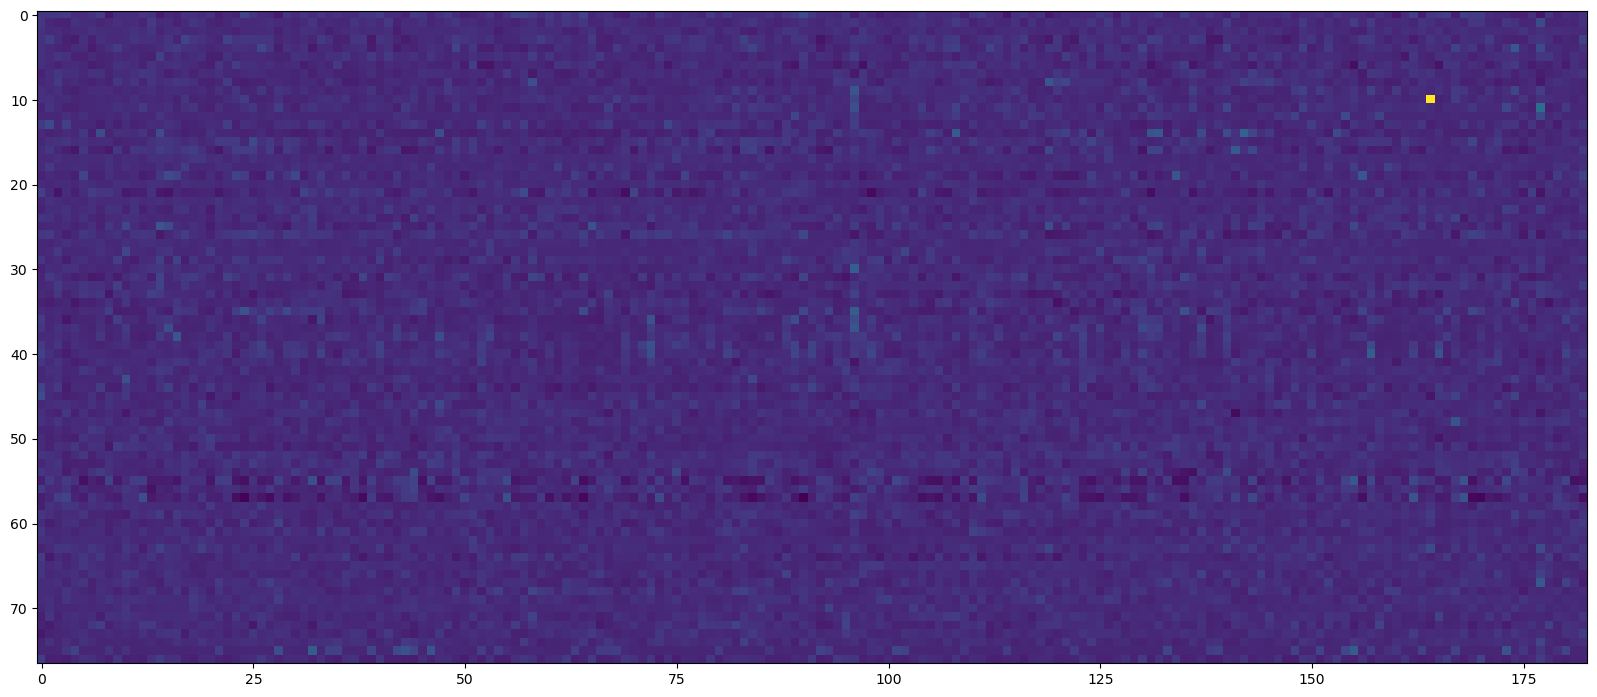

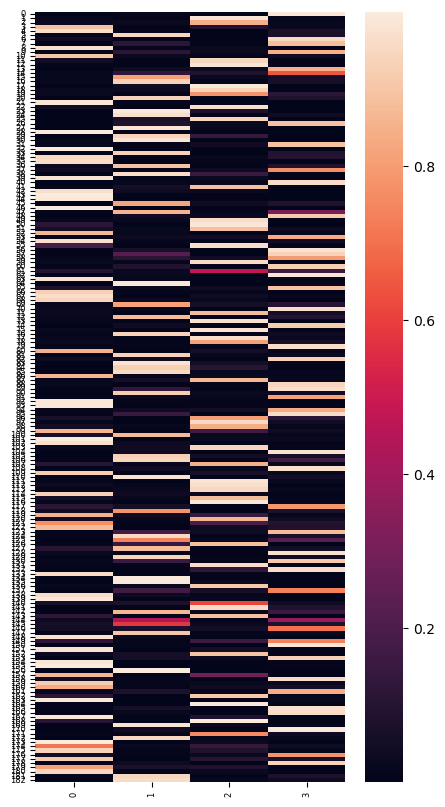

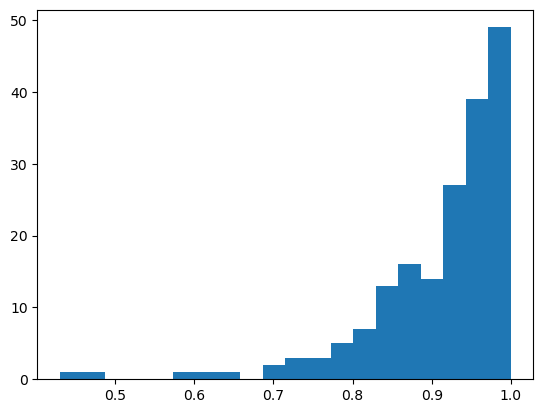

In [13]:
from neuralmonkey.analyses.decode_moment import Decoder
var = "seqc_0_shape" # Decoded variable
twind_train = [0.1, 0.7]

Dc = Decoder(PAtrain, var, twind_train)
Dc.train_decoder(PLOT=True)


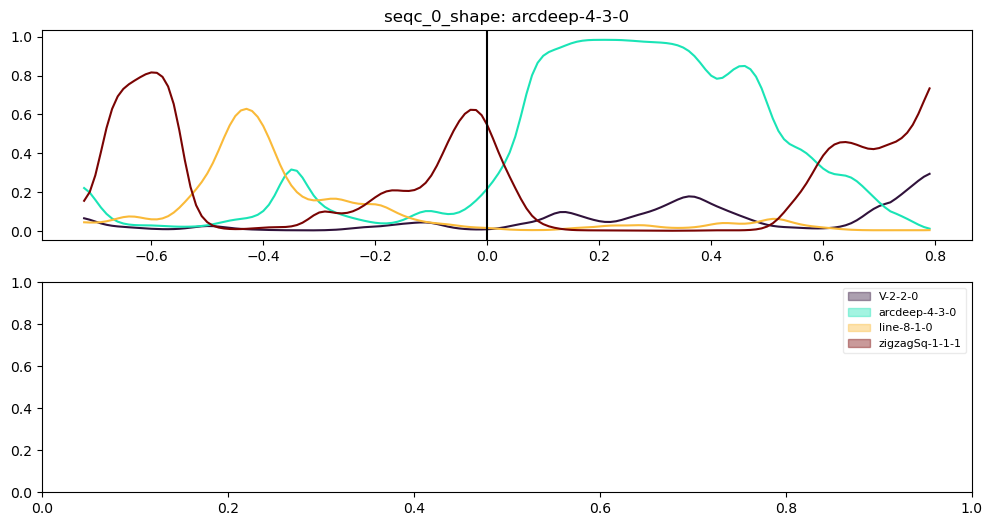

In [14]:
trial = 100
Dc.plot_single_trial(trial)

##### Get a single scalar score (by averaging the decode across time bins)


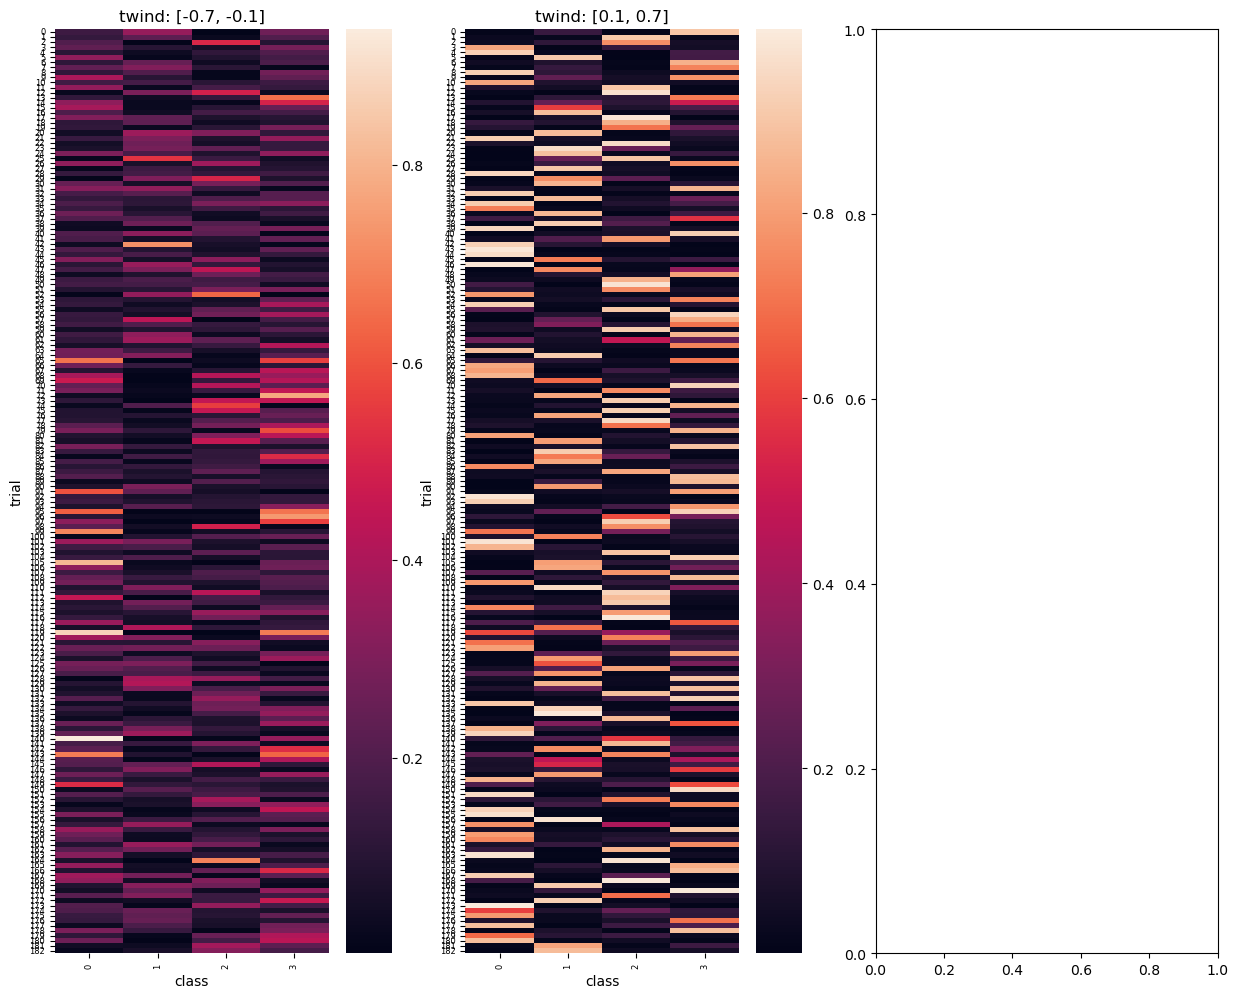

In [15]:
list_twind = [
    [-0.7, -0.1],
    [0.1, 0.7],
]

scores = Dc.scalar_score_twinds_trials(list_twind)

##### Average the decode over trials, to return a single row per trial class

In [16]:
# Returns array: (ntrial classes, n decode clasess, ntwinds)

0 ('V-2-2-0',)
0 ('arcdeep-4-3-0',)
0 ('line-8-1-0',)
0 ('zigzagSq-1-1-1',)
1 ('V-2-2-0',)
1 ('arcdeep-4-3-0',)
1 ('line-8-1-0',)
1 ('zigzagSq-1-1-1',)


array([[[0.19480701, 0.85707625],
        [0.14714422, 0.03806793],
        [0.13681015, 0.08530245],
        [0.19798201, 0.05451685]],

       [[0.16671219, 0.02269325],
        [0.14518006, 0.81550041],
        [0.17565775, 0.05658894],
        [0.22745771, 0.1376132 ]],

       [[0.18851089, 0.08090218],
        [0.12473122, 0.05182295],
        [0.21195934, 0.83763045],
        [0.19190747, 0.0671333 ]],

       [[0.21222409, 0.04299908],
        [0.16459678, 0.11334115],
        [0.13496629, 0.05256534],
        [0.22062916, 0.80727901]]])

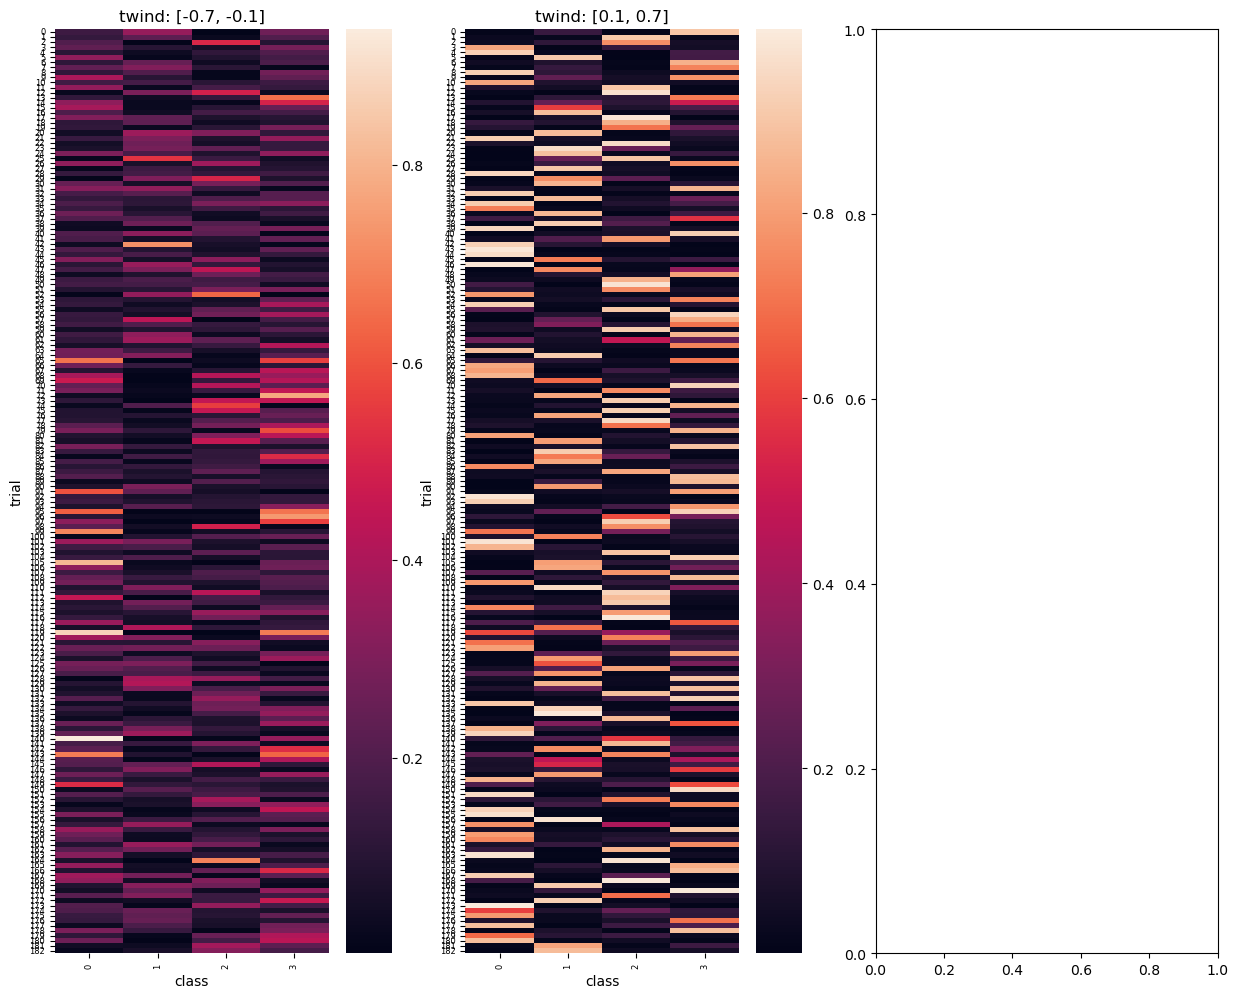

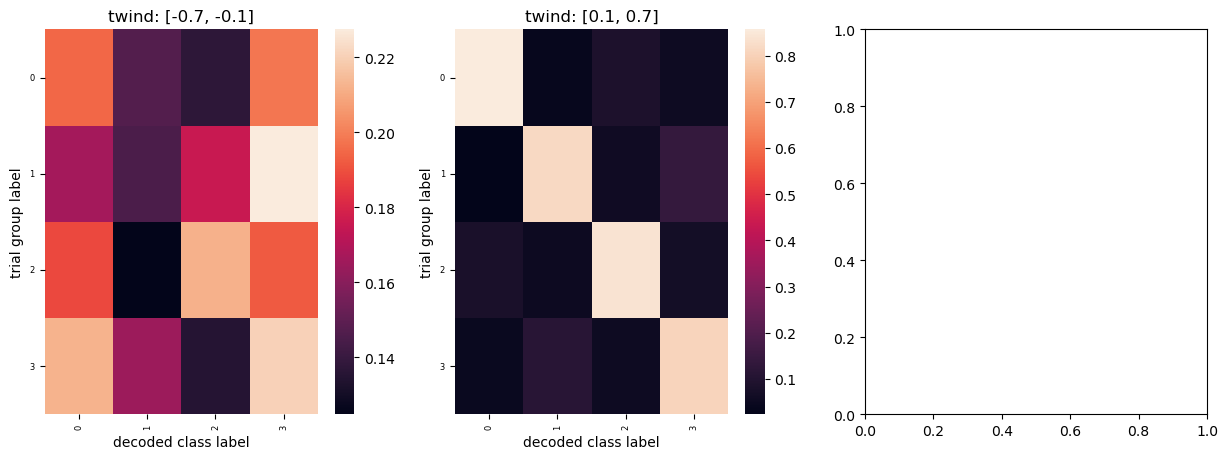

In [17]:
vars_trial = ["seqc_0_shape"]

Dc.scalar_score_twinds_trialgroupings(vars_trial, list_twind, PLOT=True)

In [18]:
Dc.PAtrain

# Testing the hypothesis

In [19]:
# PRint trials with > 1 stroke
dflab = PA.Xlabels["trials"]
dflab[dflab["FEAT_num_strokes_task"]>1].index.tolist()

[2,
 4,
 5,
 6,
 7,
 8,
 9,
 11,
 12,
 13,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 36,
 39,
 40,
 41,
 43,
 44,
 45,
 47,
 48,
 49,
 50,
 52,
 53,
 56,
 57,
 58,
 59,
 60,
 62,
 63,
 64,
 65,
 66,
 67,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 79,
 80,
 81,
 82,
 83,
 85,
 86,
 87,
 89,
 90,
 91,
 92,
 93,
 94,
 97,
 99,
 100,
 101,
 102,
 103,
 104,
 107,
 108,
 109,
 110,
 111,
 112,
 116,
 117,
 119,
 122,
 123,
 124,
 126,
 127,
 128,
 132,
 135,
 137,
 139,
 140,
 142,
 143,
 145,
 146,
 150,
 154,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 165,
 166,
 167,
 168,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 184,
 186,
 187,
 188,
 190,
 192,
 194,
 195,
 196,
 198,
 200,
 201,
 202,
 203,
 206,
 207,
 208,
 209,
 210,
 213,
 214,
 215,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 227,
 228,
 229,
 230,
 231,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 245,
 246,
 248,
 249,
 25

stroke 0  --  zigzagSq-1-1-1
stroke 1  --  V-2-2-0
stroke 2  --  arcdeep-4-3-0
stroke 3  --  IGN


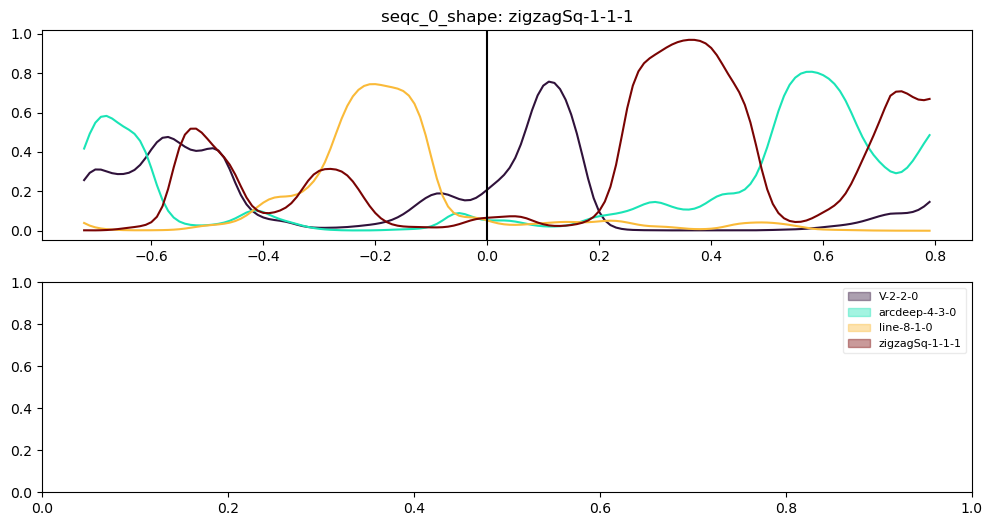

In [20]:
# Plot a multi-stroke trial 
# NOTE: you can see here switching between representations of shapes

trial = 295

for i in [0,1,2,3]:
    print("stroke", i, " -- ", dflab.iloc[trial][f"seqc_{i}_shape"])

tbin_dur=0.15
tbin_slide=0.01
Dc.plot_single_trial(trial, PA=PA, tbin_dur=tbin_dur, tbin_slide=tbin_slide)


#### plot after sort labels (in progress)


In [21]:
# NOTE: this is written for a very specific expeirmetn (Novel vs. orig prims)_.

In [22]:
def F(x):
    if "novelprim" in x:
        return f"2{x}"
    elif "presamp" in x:
        return f"3{x}"
    else:
        return f"1{x}"


In [23]:
labs_rows = [x[0] for x in grpdict.keys()]
labs_for_sorting = [F(x) for x in labs_rows]
inds = np.argsort(labs_for_sorting)
print(labs_for_sorting)
res_sorted = resthis[inds, :, :]
labs_rows_sorted = [labs_rows[i] for i in inds]

labs_cols = mlb.classes_
labs_for_sorting = [F(x) for x in labs_cols]
print(labs_for_sorting)
inds = np.argsort(labs_for_sorting)
res_sorted = res_sorted[:, inds, :]
labs_cols_sorted = [labs_cols[i] for i in inds]

from pythonlib.tools.snstools import heatmap_mat

ncols = 3
nrows = int(np.ceil(len(list_twind)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*7, nrows*5))

for ax, ind_twind in zip(axes.flatten(), range(len(list_twind))):
    if True:
        heatmap_mat(res_sorted[:, :, ind_twind], ax, False, zlims=(0, 0.3))    
        ax.set_xlabel("decoded class label")
        ax.set_ylabel("trial label")
        ax.set_title(f"twind: {list_twind[ind_twind]}")
    else:
        res_vec = np.mean(res_sorted[:, :, ind_twind], axis=0)
        xlab = [f"{i}-{x[:1]}" for i, x in enumerate(labs_cols_sorted)]
        ax.plot(xlab, res_vec, "ok")

        from pythonlib.tools.plottools import rotate_x_labels
        rotate_x_labels(ax)
        ax.set_xlabel("decoded class label")
        ax.set_ylabel("trial label")
        ax.set_title(f"twind: {list_twind[ind_twind]}")
        ax.set_ylim([0, 0.1])

        

NameError: name 'grpdict' is not defined

# Older methods

### Extract single trial results

In [ ]:

# PARAMS
var_decode = "seqc_0_shape"
bregion = "PMv"
twind = (-0.4, 0.6)

In [ ]:

a = DFRES["var_decode"]==var_decode
b = DFRES["bregion"]==bregion
c = DFRES["twind"]==twind
dfthis = DFRES[a & b & c]

times = dfthis["time"]
import numpy as np
labels_predicted = np.stack(dfthis["labels_predicted"]).T # (ntrials, ntimes)
labels_test = np.stack(dfthis["labels_test"]).T
conf_scores = np.transpose(np.stack(dfthis["conf_scores"]), [1,0,2]) # (ntrials, ntimes, nclasses)

# score each time bin as correct or incorrect
labels_correct = (labels_predicted == labels_test).astype(int)


In [ ]:
# For each trial, what was its label
assert np.all(np.diff(labels_test, axis=1))==0, "otherwise cant do next step."
labels_each_trial = labels_test[:,0]
labels_orig = PA_test.Xlabels["trials"][var_decode].tolist()
assert len(labels_orig)==len(labels_each_trial)

map_labint_to_trials = {}
map_labint_to_laborig = {}
labels_unique = np.unique(labels_each_trial)
for lab in labels_unique:
    inds_this_label = np.argwhere(labels_each_trial == lab).squeeze() # the indices which ahve this label as the CORRECT
    map_labint_to_trials[lab] = inds_this_label

    # Map it back to original label
    lab_orig = PA_test.Xlabels["trials"][var_decode][inds_this_label].unique()
    assert len(lab_orig)==1
    map_labint_to_laborig[lab] = lab_orig[0]

map_trial_to_labint = {i:labint for i, labint in enumerate(labels_each_trial)}
print(map_labint_to_laborig)    
map_laborig_to_labint = {}
for labint, laborig in map_labint_to_laborig.items():
    assert laborig not in map_laborig_to_labint
    map_laborig_to_labint[laborig] = labint

import matplotlib.pyplot as plt
from pythonlib.tools.plottools import makeColors
pcols = makeColors(len(map_labint_to_laborig))
map_trial_to_seq = {}
map_trial_to_seq_ints = {}
for i, seq in enumerate(PA_test.Xlabels["trials"].loc[:, ["seqc_0_shape", "seqc_1_shape"]].values.tolist()):
    map_trial_to_seq[i] = (tuple(seq))
    map_trial_to_seq_ints[i] = [map_laborig_to_labint[s] if s in map_laborig_to_labint else s for s in seq]


In [ ]:
# Pick n random trials
import random
n=  9
trials_all = list(range(len(map_trial_to_labint)))
trials = random.sample(trials_all, n)
ncols = 3
nrows = int(np.ceil(len(trials)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3), sharex=True, sharey=True)

for tr, ax in zip(trials, axes.flatten()):
    
    # ax = axes.flatten()[0]
    lab_pred = labels_predicted[tr,:]
    # lab_corr = labels_correct[trial,:]
    # lab_test = labels_test[trial,:]
    # ax.plot(times, lab_pred, "-ok"),
    # ax.plot(times, lab_test, "-r")
    
    # for each class, plot its time series
    for labint in map_labint_to_laborig:
        cs_this_lab = conf_scores[tr, :, labint].squeeze()
        
        ax.plot(times, cs_this_lab, label=labint, color=pcols[labint])
        # ax.plot(times[lab_pred==labint], cs_this_lab[lab_pred==labint], "-", color=pcols[labint], linewidth=4)
        ax.plot(times[lab_pred==labint], cs_this_lab[lab_pred==labint], "s", color=pcols[labint])
    
    ax.axvline(0, color="k", alpha=0.5)
    ax.set_title(f"{var_decode}={map_trial_to_labint[tr]}", color=pcols[map_trial_to_labint[tr]])
    ax.set_xlabel(f"seq: {map_trial_to_seq_ints[tr]}")
    ax.legend()
        

In [ ]:
# For each class label, collect all trials for which that is the correct label, and overlap

labels_unique = np.unique(labels_each_trial)
ncols = 3
nrows = int(np.ceil(len(labels_unique)/ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4))

for lab, ax in zip(labels_unique, axes.flatten()):
    inds_this_label = np.argwhere(labels_each_trial == lab).squeeze() # the indices which ahve this label as the CORRECT 
    ax.plot(times, labels_predicted[inds_this_label, :].T, "-ok", alpha=0.05)
    ax.set_title(lab)
    
    

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

ax = axes.flatten()[0]
ax.plot(times, labels_correct.T, "xk", alpha=0.003);

In [ ]:
##### Plot the results, comparing score across methods!!
%matplotlib inline
import seaborn as sns
fig = sns.relplot(data=DFRES, x="time", y="score", hue="bregion", col="var_decode",  kind="line")


In [ ]:
##### Plot the results, comparing score across methods!!
%matplotlib inline
import seaborn as sns
fig = sns.relplot(data=DFRES, x="time", y="score", hue="bregion", col="var_decode",  kind="line")


In [ ]:
from neuralmonkey.analyses.decode_good import decodewrapouterloop_categorical_cross_time